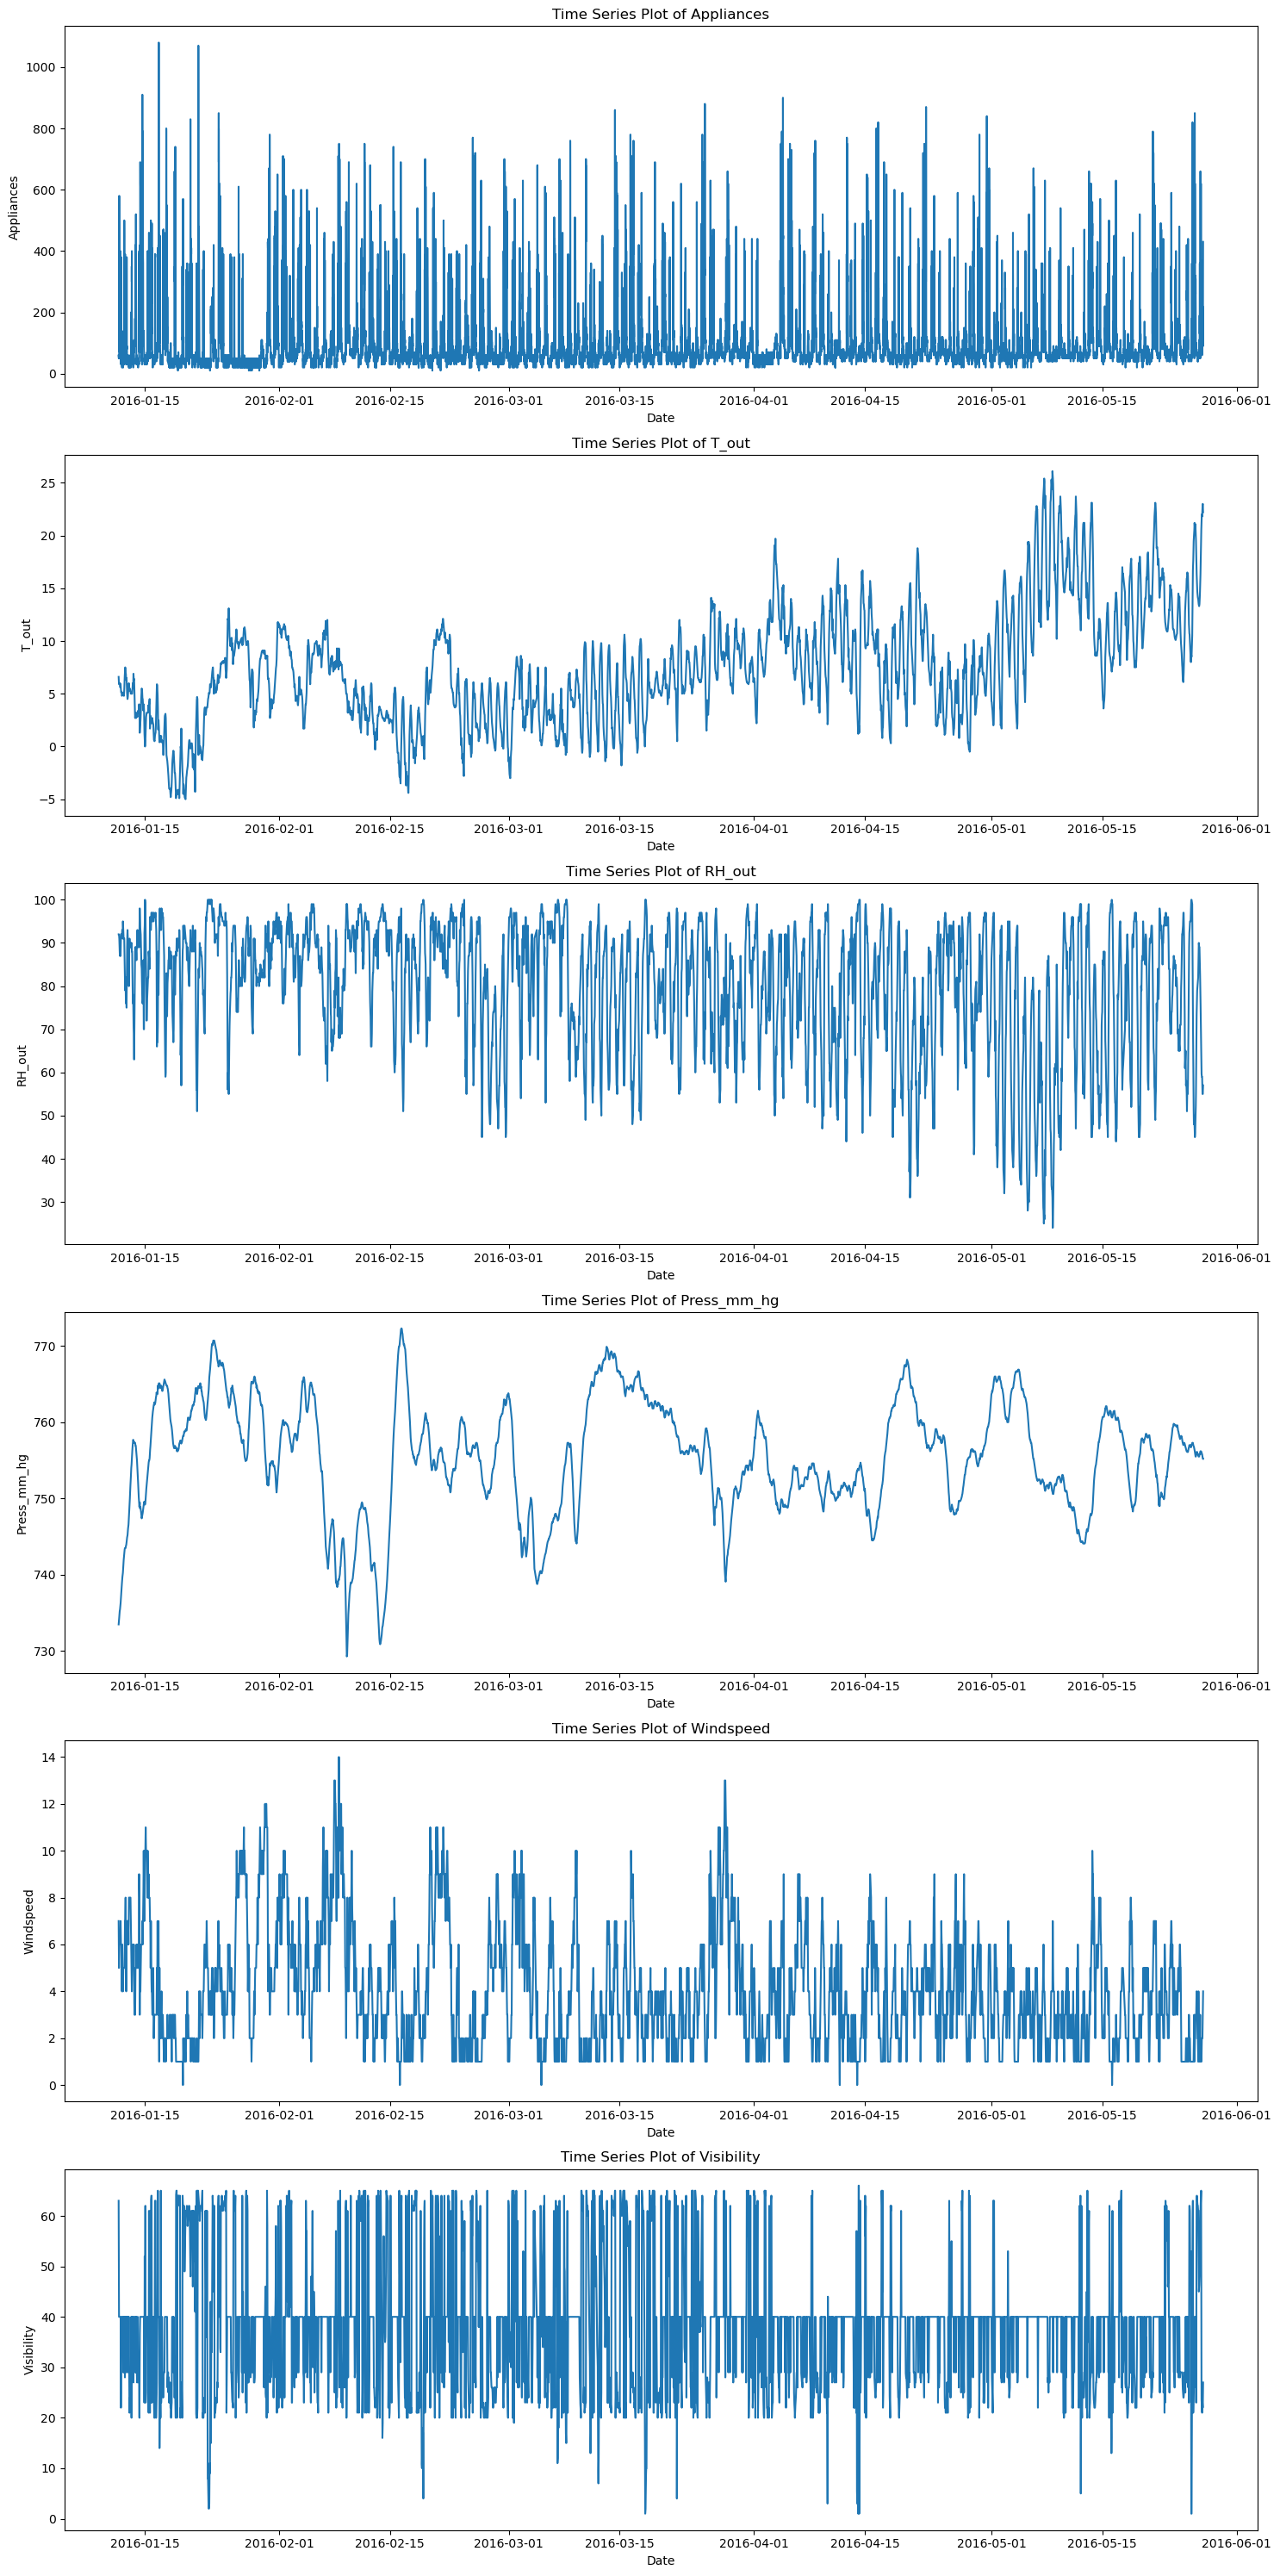

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


data = pd.read_csv('energydata_complete.csv')
# Preprocessing
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])


# Example variables: 'Appliances', 'T2' (Temperature in living room), 'RH_out' (Humidity outside)
variables_to_plot = ['Appliances', "T_out", 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility']

# Plotting
plt.figure(figsize=(15, 5 * len(variables_to_plot)))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(len(variables_to_plot), 1, i)
    plt.plot(data['date'], data[var])
    plt.title(f'Time Series Plot of {var}')
    plt.xlabel('Date')
    plt.ylabel(var)

plt.tight_layout()
plt.show()



Epoch 1/500
158/158 - 7s - loss: 0.0090 - val_loss: 0.0080 - 7s/epoch - 43ms/step
Epoch 2/500
158/158 - 1s - loss: 0.0085 - val_loss: 0.0078 - 807ms/epoch - 5ms/step
Epoch 3/500
158/158 - 1s - loss: 0.0083 - val_loss: 0.0077 - 795ms/epoch - 5ms/step
Epoch 4/500
158/158 - 1s - loss: 0.0082 - val_loss: 0.0077 - 804ms/epoch - 5ms/step
Epoch 5/500
158/158 - 1s - loss: 0.0081 - val_loss: 0.0076 - 800ms/epoch - 5ms/step
Epoch 6/500
158/158 - 1s - loss: 0.0081 - val_loss: 0.0076 - 773ms/epoch - 5ms/step
Epoch 7/500
158/158 - 1s - loss: 0.0080 - val_loss: 0.0075 - 762ms/epoch - 5ms/step
Epoch 8/500
158/158 - 1s - loss: 0.0080 - val_loss: 0.0075 - 763ms/epoch - 5ms/step
Epoch 9/500
158/158 - 1s - loss: 0.0079 - val_loss: 0.0074 - 765ms/epoch - 5ms/step
Epoch 10/500
158/158 - 1s - loss: 0.0079 - val_loss: 0.0074 - 764ms/epoch - 5ms/step
Epoch 11/500
158/158 - 1s - loss: 0.0079 - val_loss: 0.0074 - 764ms/epoch - 5ms/step
Epoch 12/500
158/158 - 1s - loss: 0.0078 - val_loss: 0.0074 - 762ms/epoch - 

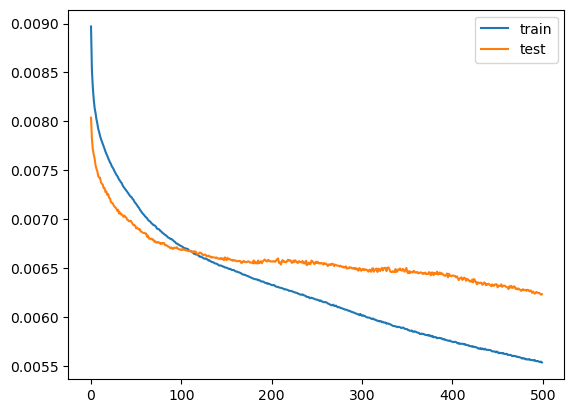

124/124 [==============================] - 0s 2ms/step


In [142]:
# LSTM model
model = Sequential()
model.add(LSTM(50, activation = "relu", input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=500, batch_size=100, validation_data=(X_test, y_test), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [143]:
# Inverse transform the predictions
y_train_inv = target_scaler.inverse_transform(train_predict)
y_test_inv = target_scaler.inverse_transform(test_predict)

# Reversing the transformation of y_train and y_test for error calculation
y_train_actual = target_scaler.inverse_transform(y_train)
y_test_actual = target_scaler.inverse_transform(y_test)

# Calculate MAE and RMSE
train_mae = mean_absolute_error(y_train_actual, y_train_inv)
test_mae = mean_absolute_error(y_test_actual, y_test_inv)
train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_inv))


# Printing the errors
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

Test MAE: 47.81370730638081
Test RMSE: 84.46945106847065


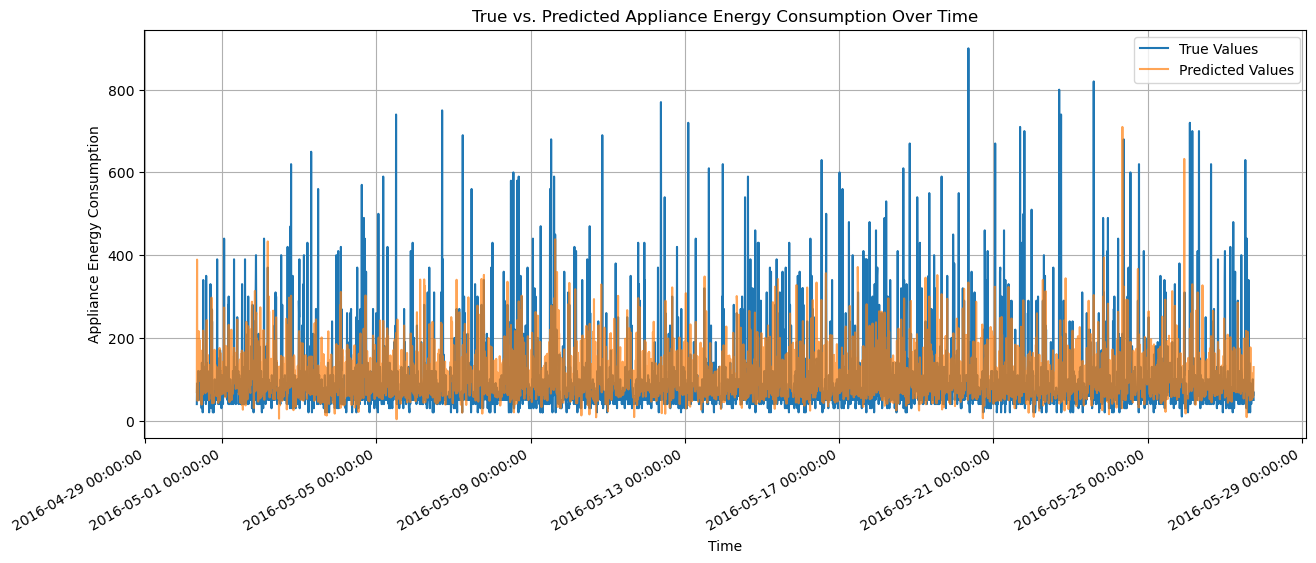

In [133]:
# Extracting timestamps for the test dataset
test_timestamps = data.iloc[-len(test_data):].index

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(test_timestamps, target_scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Values')
plt.plot(test_timestamps, y_test_inv, label='Predicted Values', alpha=0.7)

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Appliance Energy Consumption')
plt.title('True vs. Predicted Appliance Energy Consumption Over Time')
plt.legend()
plt.grid(True)

# Formatting the date on the x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()


Epoch 1/10
494/494 [==============================] - 3s 4ms/step - loss: 0.0066
Epoch 2/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0062
Epoch 3/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0061
Epoch 4/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0060
Epoch 5/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0060
Epoch 6/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0060
Epoch 7/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0060
Epoch 8/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0060
Epoch 9/10
494/494 [==============================] - 2s 4ms/step - loss: 0.0059
Epoch 10/10
124/124 [==============================] - 0s 3ms/step


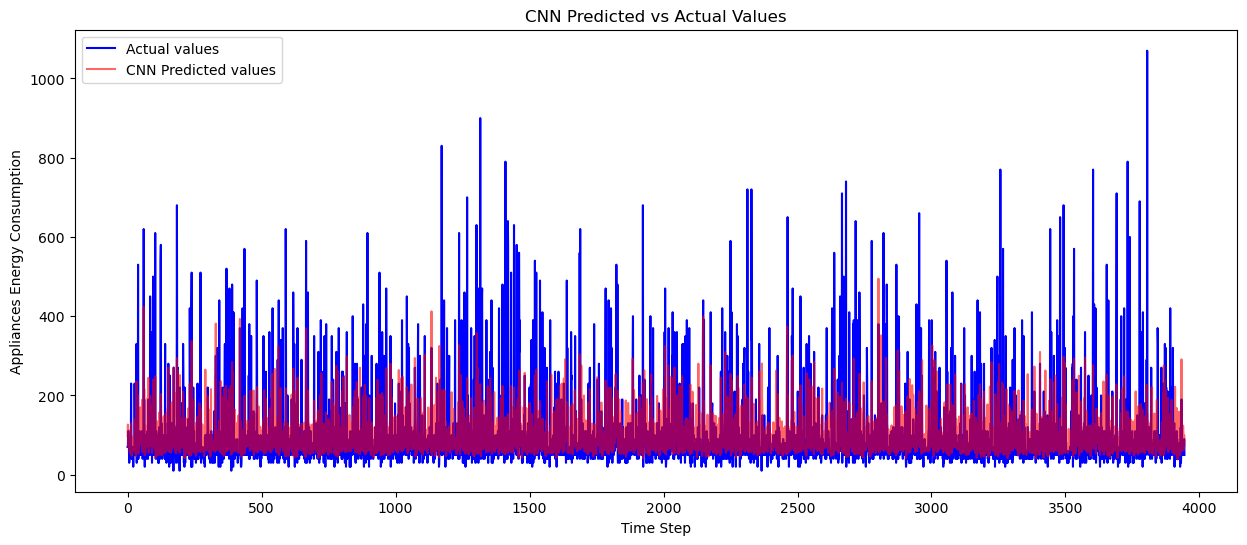

(85.04570479352958, 44.8753832441168)

In [144]:
# Re-import the necessary libraries as the environment has been reset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the dataset again
file_path = 'energydata_complete.csv'
energy_data = pd.read_csv(file_path)

# Let's focus on one variable for simplicity, e.g., 'Appliances'
# Preprocess the data for the CNN
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(energy_data['Appliances'].values.reshape(-1, 1))

# Prepare the dataset for the CNN
time_steps = 10  # Use 10 time steps to predict the next step
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape data for CNN input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=10, verbose=1)  # Set to 10 epochs for quick demonstration

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# Plotting Predicted vs. Actual values
plt.figure(figsize=(15, 6))
plt.plot(y_test_inv.flatten(), label='Actual values', color='blue')
plt.plot(y_pred_inv.flatten(), label='CNN Predicted values', color='red', alpha=0.6)
plt.title('CNN Predicted vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Appliances Energy Consumption')
plt.legend()
plt.show()

rmse, mae


Epoch 1/500
158/158 - 4s - loss: 0.0094 - val_loss: 0.0082 - 4s/epoch - 22ms/step
Epoch 2/500
158/158 - 1s - loss: 0.0087 - val_loss: 0.0081 - 690ms/epoch - 4ms/step
Epoch 3/500
158/158 - 1s - loss: 0.0085 - val_loss: 0.0080 - 684ms/epoch - 4ms/step
Epoch 4/500
158/158 - 1s - loss: 0.0084 - val_loss: 0.0079 - 730ms/epoch - 5ms/step
Epoch 5/500
158/158 - 1s - loss: 0.0083 - val_loss: 0.0078 - 789ms/epoch - 5ms/step
Epoch 6/500
158/158 - 1s - loss: 0.0082 - val_loss: 0.0078 - 726ms/epoch - 5ms/step
Epoch 7/500
158/158 - 1s - loss: 0.0081 - val_loss: 0.0077 - 685ms/epoch - 4ms/step
Epoch 8/500
158/158 - 1s - loss: 0.0081 - val_loss: 0.0077 - 677ms/epoch - 4ms/step
Epoch 9/500
158/158 - 1s - loss: 0.0080 - val_loss: 0.0077 - 655ms/epoch - 4ms/step
Epoch 10/500
158/158 - 1s - loss: 0.0080 - val_loss: 0.0077 - 641ms/epoch - 4ms/step
Epoch 11/500
158/158 - 1s - loss: 0.0079 - val_loss: 0.0077 - 663ms/epoch - 4ms/step
Epoch 12/500
158/158 - 1s - loss: 0.0079 - val_loss: 0.0076 - 678ms/epoch - 

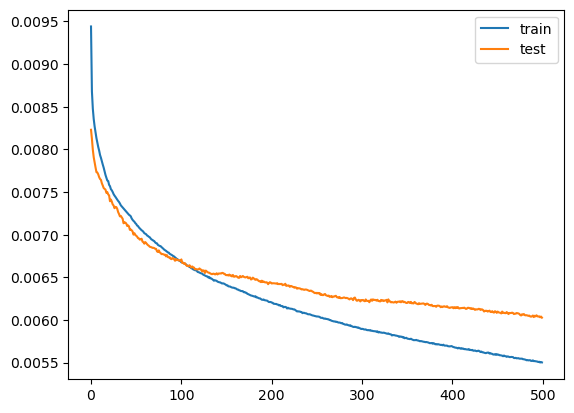

124/124 [==============================] - 0s 2ms/step


In [145]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv('energydata_complete.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Target variable
target = 'Appliances'

# Selecting features
features = data.drop(columns=[target, 'lights'])  # Dropping 'lights' as it may not be a relevant predictor
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Scaling the target separately
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(data[target].values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Reshaping input for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(GRU(50, activation = 'relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=500, batch_size=100, validation_data=(X_test, y_test), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


In [146]:
# Inverse transform the predictions
y_train_inv = target_scaler.inverse_transform(train_predict)
y_test_inv = target_scaler.inverse_transform(test_predict)

# Reversing the transformation of y_train and y_test for error calculation
y_train_actual = target_scaler.inverse_transform(y_train)
y_test_actual = target_scaler.inverse_transform(y_test)

# Calculate MAE and RMSE
train_mae = mean_absolute_error(y_train_actual, y_train_inv)
test_mae = mean_absolute_error(y_test_actual, y_test_inv)
train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_inv))


# Printing the errors
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

Test MAE: 46.92751409076032
Test RMSE: 83.07247087109033


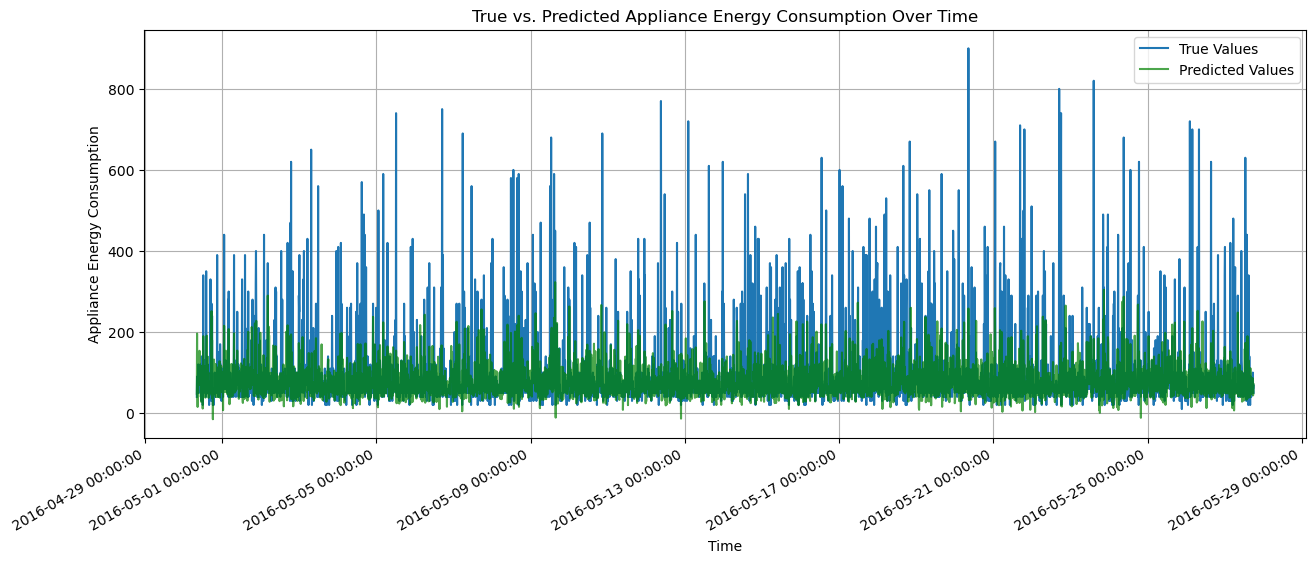

In [105]:
# Extracting timestamps for the test dataset
test_timestamps = data.iloc[-len(test_data):].index

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(test_timestamps, target_scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Values')
plt.plot(test_timestamps, y_test_inv, label='Predicted Values', alpha=0.7, color = 'green')

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Appliance Energy Consumption')
plt.title('True vs. Predicted Appliance Energy Consumption Over Time')
plt.legend()
plt.grid(True)

# Formatting the date on the x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()